<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
# checking the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [10]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-336345893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-336345893.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-336345893.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [11]:
car_dataset.info()  # replace will downcast to int from onject

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [13]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1 - Linear Regression

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared Error
r2_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", r2_score)

# Mean Absoulte Error
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error : ", mae)

# Mean Squared Error
mse = metrics.mean_squared_error(Y_train, training_data_prediction)
print("Mean Squared Error : ", mse)

R squared Error :  0.8799451660493711
Mean Absolute Error :  1.2166174093911273
Mean Squared Error :  3.2590308233090868


Visualize the actual prices and Predicted prices

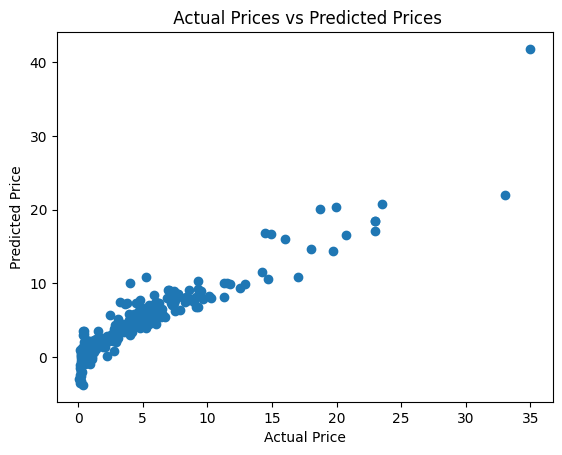

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [20]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared error
test_r2_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", test_r2_score)

# Mean Absolute Error
test_mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error : ", test_mae)

# Mean Squared Error
test_mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error : ", test_mse)

R squared Error :  0.8365766715027051
Mean Absolute Error :  1.1516382156613783
Mean Squared Error :  2.1501299189836294


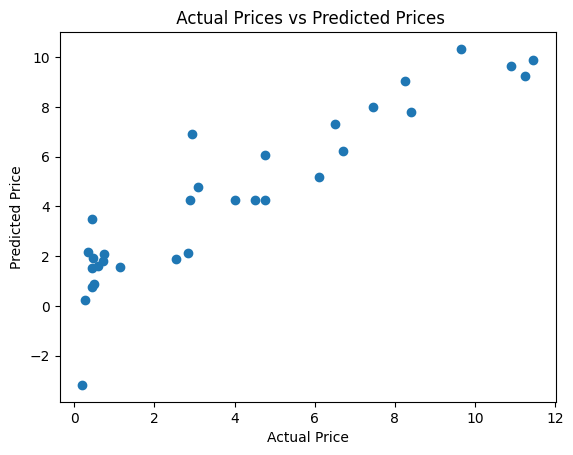

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


2.   Lasso Regression

In [23]:
# loading the linear regression model
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [25]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


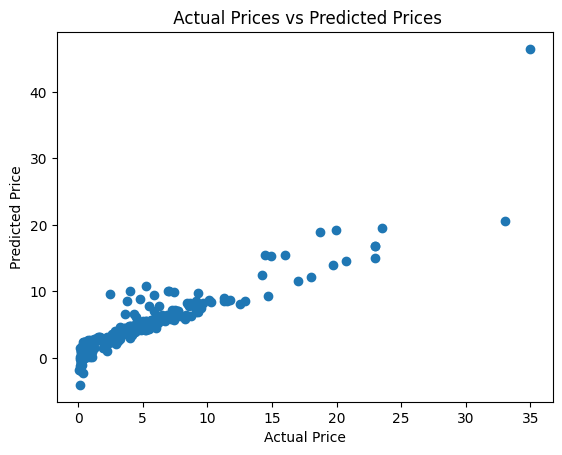

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [28]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


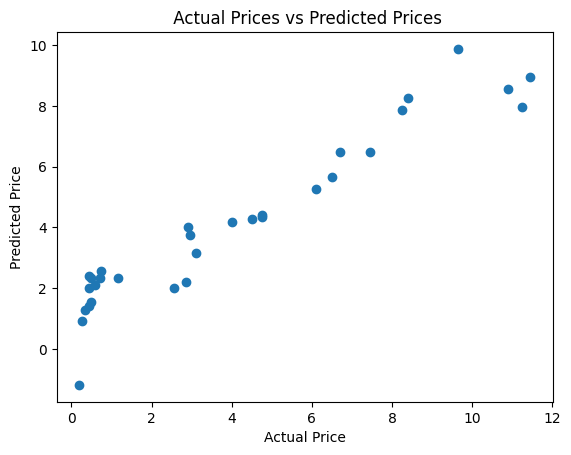

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Make a Prediction

Now, let's take some input values and predict the selling price using the trained models.

In [32]:
# Gather input for a new car
print("Enter car details for prediction:")
year = int(input("Year (e.g., 2014): "))
present_price = float(input("Present Price (in Lakhs, e.g., 5.59): "))
kms_driven = int(input("Kilometers Driven (e.g., 27000): "))
fuel_type_str = input("Fuel Type (Enter 'Petrol', 'Diesel', or 'CNG'): ")
seller_type_str = input("Seller Type (Enter 'Dealer' or 'Individual'): ")
transmission_str = input("Transmission (Enter 'Manual' or 'Automatic'): ")
owner = int(input("Number of Owners (0, 1, 2, etc.): "))

# Encode categorical input
fuel_type_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
seller_type_map = {'Dealer': 0, 'Individual': 1}
transmission_map = {'Manual': 0, 'Automatic': 1}

fuel_type = fuel_type_map.get(fuel_type_str, -1) # -1 indicates invalid input
seller_type = seller_type_map.get(seller_type_str, -1)
transmission = transmission_map.get(transmission_str, -1)

if fuel_type == -1 or seller_type == -1 or transmission == -1:
    print("Error: Invalid categorical input. Please check your spelling and ensure you are entering the full string (e.g., 'Petrol').")
else:
    # Create a list with the input data in the correct order
    # The order should match the features in X_train: Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner
    input_data = [year, present_price, kms_driven, fuel_type, seller_type, transmission, owner]

    # Convert the input data to a numpy array and reshape it for a single prediction
    import numpy as np
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    print("\n--- Predictions ---")
    # Predict with Linear Regression model
    lin_reg_prediction = lin_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Linear Regression): {lin_reg_prediction[0]:.2f} Lakhs")

    # Predict with Lasso Regression model
    lasso_reg_prediction = lass_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Lasso Regression): {lasso_reg_prediction[0]:.2f} Lakhs")

Enter car details for prediction:
Year (e.g., 2014): 2022
Present Price (in Lakhs, e.g., 5.59): 12.00
Kilometers Driven (e.g., 27000): 50000
Fuel Type (Enter 'Petrol', 'Diesel', or 'CNG'): Petrol
Seller Type (Enter 'Dealer' or 'Individual'): Individual
Transmission (Enter 'Manual' or 'Automatic'): Automatic
Number of Owners (0, 1, 2, etc.): 1

--- Predictions ---
Predicted Selling Price (Linear Regression): 9.40 Lakhs
Predicted Selling Price (Lasso Regression): 9.67 Lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## 3. Random Forest Regressor

Random Forest - Training R squared Error: 0.9883896196080834
Random Forest - Test R squared Error: 0.9812700527143337


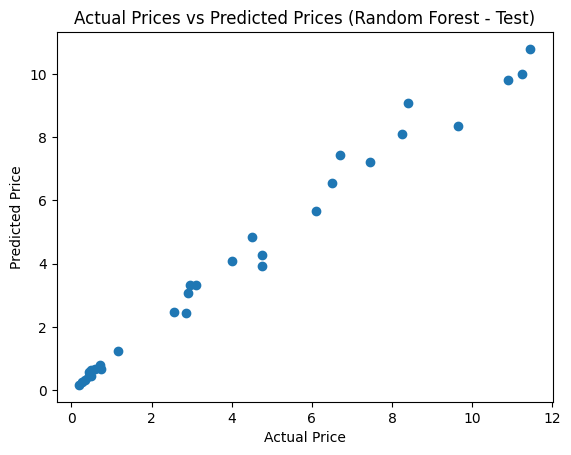

In [34]:
# Loading the Random Forest Regressor model
rf_reg_model = RandomForestRegressor(random_state=2)
rf_reg_model.fit(X_train, Y_train)

# Prediction on Training data
training_data_prediction_rf = rf_reg_model.predict(X_train)

# R squared Error
rf_r2_score_train = metrics.r2_score(Y_train, training_data_prediction_rf)
print(f"Random Forest - Training R squared Error: {rf_r2_score_train}")

# Prediction on Test data
test_data_prediction_rf = rf_reg_model.predict(X_test)

# R squared Error
rf_r2_score_test = metrics.r2_score(Y_test, test_data_prediction_rf)
print(f"Random Forest - Test R squared Error: {rf_r2_score_test}")

# Visualize the actual prices and Predicted prices for Random Forest (Test Data)
plt.scatter(Y_test, test_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Random Forest - Test)")
plt.show()

## 4. Gradient Boosting Regressor

Gradient Boosting - Training R squared Error: 0.9956442958815374
Gradient Boosting - Test R squared Error: 0.9808777091798009


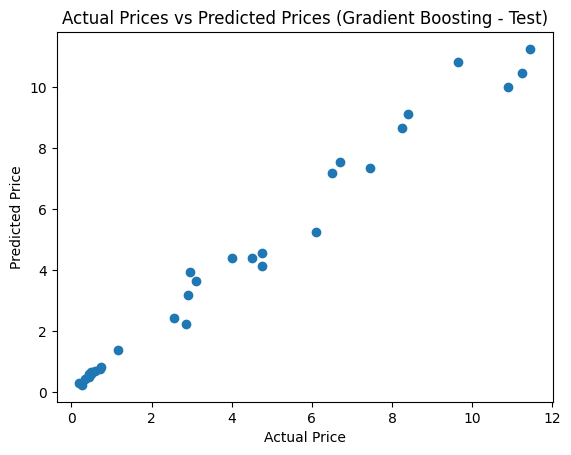

In [35]:
# Loading the Gradient Boosting Regressor model
gb_reg_model = GradientBoostingRegressor(random_state=2)
gb_reg_model.fit(X_train, Y_train)

# Prediction on Training data
training_data_prediction_gb = gb_reg_model.predict(X_train)

# R squared Error
gb_r2_score_train = metrics.r2_score(Y_train, training_data_prediction_gb)
print(f"Gradient Boosting - Training R squared Error: {gb_r2_score_train}")

# Prediction on Test data
test_data_prediction_gb = gb_reg_model.predict(X_test)

# R squared Error
gb_r2_score_test = metrics.r2_score(Y_test, test_data_prediction_gb)
print(f"Gradient Boosting - Test R squared Error: {gb_r2_score_test}")

# Visualize the actual prices and Predicted prices for Gradient Boosting (Test Data)
plt.scatter(Y_test, test_data_prediction_gb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Gradient Boosting - Test)")
plt.show()

## 5. XGBoost Regressor

XGBoost - Training R squared Error: 0.9999896680984235
XGBoost - Test R squared Error: 0.9807321370840111


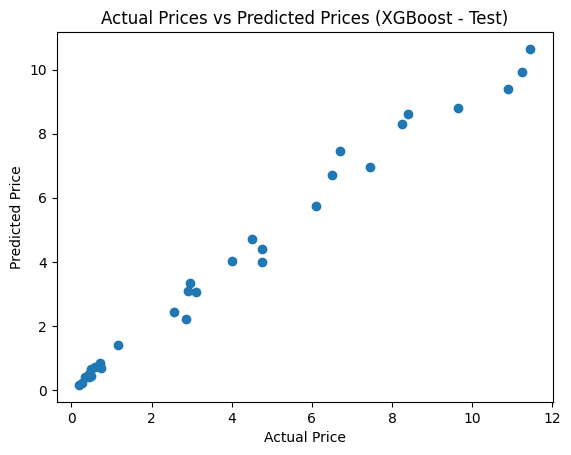

In [36]:
# Loading the XGBoost Regressor model
xgb_reg_model = XGBRegressor(random_state=2)
xgb_reg_model.fit(X_train, Y_train)

# Prediction on Training data
training_data_prediction_xgb = xgb_reg_model.predict(X_train)

# R squared Error
xgb_r2_score_train = metrics.r2_score(Y_train, training_data_prediction_xgb)
print(f"XGBoost - Training R squared Error: {xgb_r2_score_train}")

# Prediction on Test data
test_data_prediction_xgb = xgb_reg_model.predict(X_test)

# R squared Error
xgb_r2_score_test = metrics.r2_score(Y_test, test_data_prediction_xgb)
print(f"XGBoost - Test R squared Error: {xgb_r2_score_test}")

# Visualize the actual prices and Predicted prices for XGBoost (Test Data)
plt.scatter(Y_test, test_data_prediction_xgb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (XGBoost - Test)")
plt.show()

In [41]:
# Gather input for a new car
print("Enter car details for prediction:")
year = int(input("Year (e.g., 2014): "))
present_price = float(input("Present Price (in Lakhs, e.g., 5.59): "))
kms_driven = int(input("Kilometers Driven (e.g., 27000): "))
fuel_type_str = input("Fuel Type (Enter 'Petrol', 'Diesel', or 'CNG'): ")
seller_type_str = input("Seller Type (Enter 'Dealer' or 'Individual'): ")
transmission_str = input("Transmission (Enter 'Manual' or 'Automatic'): ")
owner = int(input("Number of Owners (0, 1, 2, etc.): "))

# Encode categorical input
fuel_type_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
seller_type_map = {'Dealer': 0, 'Individual': 1}
transmission_map = {'Manual': 0, 'Automatic': 1}

fuel_type = fuel_type_map.get(fuel_type_str, -1) # -1 indicates invalid input
seller_type = seller_type_map.get(seller_type_str, -1)
transmission = transmission_map.get(transmission_str, -1)

if fuel_type == -1 or seller_type == -1 or transmission == -1:
    print("Error: Invalid categorical input. Please check your spelling and ensure you are entering the full string (e.g., 'Petrol').")
else:
    # Create a list with the input data in the correct order
    # The order should match the features in X_train: Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner
    input_data = [year, present_price, kms_driven, fuel_type, seller_type, transmission, owner]

    # Convert the input data to a numpy array and reshape it for a single prediction
    import numpy as np
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    print("\n--- Predictions ---")
    # Predict with Linear Regression model
    lin_reg_prediction = lin_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Linear Regression): {lin_reg_prediction[0]:.2f} Lakhs")

    # Predict with Lasso Regression model
    lasso_reg_prediction = lass_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Lasso Regression): {lasso_reg_prediction[0]:.2f} Lakhs")

    # Predict with Random Forest Regressor model
    rf_reg_prediction = rf_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Random Forest Regressor): {rf_reg_prediction[0]:.2f} Lakhs")

    # Predict with Gradient Boosting Regressor model
    gb_reg_prediction = gb_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (Gradient Boosting Regressor): {gb_reg_prediction[0]:.2f} Lakhs")

    # Predict with XGBoost Regressor model
    xgb_reg_prediction = xgb_reg_model.predict(input_data_reshaped)
    print(f"Predicted Selling Price (XGBoost Regressor): {xgb_reg_prediction[0]:.2f} Lakhs")

Enter car details for prediction:
Year (e.g., 2014): 2012
Present Price (in Lakhs, e.g., 5.59): 9.40
Kilometers Driven (e.g., 27000): 60000
Fuel Type (Enter 'Petrol', 'Diesel', or 'CNG'): Diesel
Seller Type (Enter 'Dealer' or 'Individual'): Individual
Transmission (Enter 'Manual' or 'Automatic'): Manual
Number of Owners (0, 1, 2, etc.): 1

--- Predictions ---
Predicted Selling Price (Linear Regression): 4.35 Lakhs
Predicted Selling Price (Lasso Regression): 4.86 Lakhs
Predicted Selling Price (Random Forest Regressor): 5.03 Lakhs
Predicted Selling Price (Gradient Boosting Regressor): 4.95 Lakhs
Predicted Selling Price (XGBoost Regressor): 5.11 Lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [38]:
print("\n--- Model Accuracy Comparison (R-squared) ---")
print(f"Linear Regression (Training): {r2_score:.4f}")
print(f"Linear Regression (Test): {test_r2_score:.4f}")
print(f"Lasso Regression (Training): {error_score:.4f}") # Note: 'error_score' was last assigned Lasso's training r2_score
print(f"Lasso Regression (Test): {metrics.r2_score(Y_test, lass_reg_model.predict(X_test)):.4f}") # Recalculate for clarity
print(f"Random Forest Regressor (Training): {rf_r2_score_train:.4f}")
print(f"Random Forest Regressor (Test): {rf_r2_score_test:.4f}")
print(f"Gradient Boosting Regressor (Training): {gb_r2_score_train:.4f}")
print(f"Gradient Boosting Regressor (Test): {gb_r2_score_test:.4f}")
print(f"XGBoost Regressor (Training): {xgb_r2_score_train:.4f}")
print(f"XGBoost Regressor (Test): {xgb_r2_score_test:.4f}")


--- Model Accuracy Comparison (R-squared) ---
Linear Regression (Training): 0.8799
Linear Regression (Test): 0.8366
Lasso Regression (Training): 0.8709
Lasso Regression (Test): 0.8709
Random Forest Regressor (Training): 0.9884
Random Forest Regressor (Test): 0.9813
Gradient Boosting Regressor (Training): 0.9956
Gradient Boosting Regressor (Test): 0.9809
XGBoost Regressor (Training): 1.0000
XGBoost Regressor (Test): 0.9807
